## Bar graphs
Bar graphs are especially effective when you have numerical data that splits nicely into different categories, so you can quickly see trends within your data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
events = pd.read_csv('Data/Classified_events.csv')

#### Count number of records according types. 

In [3]:
types = list(set(events.Types))
events.Types.value_counts()

Monthly Events     2214
One Time events     926
Name: Types, dtype: int64

In [4]:
value_1 = events[events.Types == types[0]].Category.value_counts().sort_index()[-5:]
value_2 = events[events.Types == types[1]].Category.value_counts().sort_index()[-5:]

# Merge two list into a dataframe
df = pd.DataFrame({'Monthly_Events':value_1,'One_Time_events':value_2})

# Using 0 to replace NAN in the table
df = df.fillna(0)
df

,Monthly_Events,One_Time_events
Sci-Fi & Games,102,17
Social,89,160
Sports & Fitness,243,38
Tech,136,99
Writing,46,7


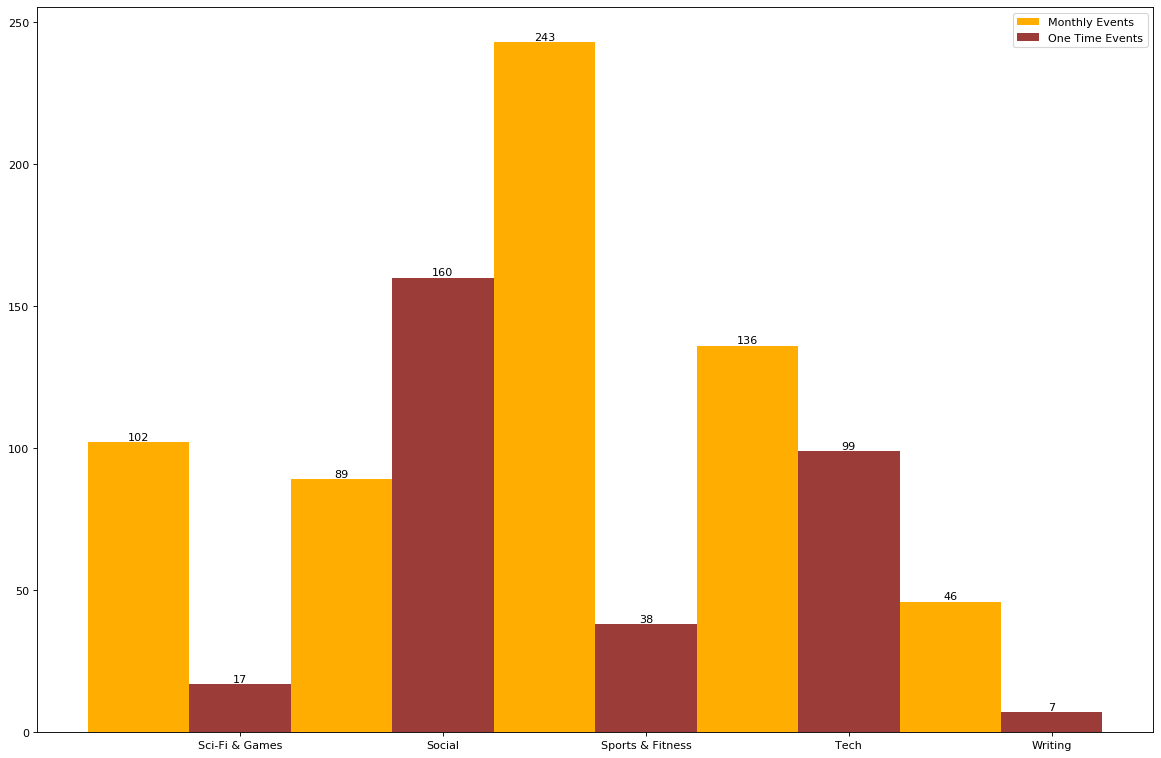

In [5]:
ind = np.arange(5)  # the x locations for the groups
width = 0.5 # the width of the bars
fig,ax = plt.subplots(figsize=(18, 12), dpi= 80)

# plot the first column of datasets
type1plot = ax.bar(ind, df.Monthly_Events, width, color = '#ffad00')
# adding the second column to the plot
type2plot = ax.bar(ind + width, df.One_Time_events, width, color = '#9b3c38')

# add some text for labels, title and axes ticks
ax.set_xticks(ind + width)
# set the row name of the dataframe as the x label
ax.set_xticklabels(df.index.values)

ax.legend((type1plot[0],type2plot[0]),('Monthly Events', 'One Time Events'))

def autolabel(rects):
    # attach text label to each bar
    for rect in rects:
        height = rect.get_height()
        hcap = str(height)
        ax.text(rect.get_x() + rect.get_width()/2., height,hcap,
               ha = 'center', va = 'bottom')
        
autolabel(type1plot)
autolabel(type2plot)

plt.show()

## Pie charts
Pie charts are useful for showing proportions on a single space or across a map.

In [6]:
labels = df.index.values
sizes = df.Monthly_Events / sum(np.array(df.Monthly_Events)) * 100
sizes

Sci-Fi & Games      16.558442
Social              14.448052
Sports & Fitness    39.448052
Tech                22.077922
Writing              7.467532
Name: Monthly_Events, dtype: float64

In [7]:
# set the condition of each pie chart
explode = [0] * (len(sizes) - 1)
explode.append(1)
explode

[0, 0, 0, 0, 1]

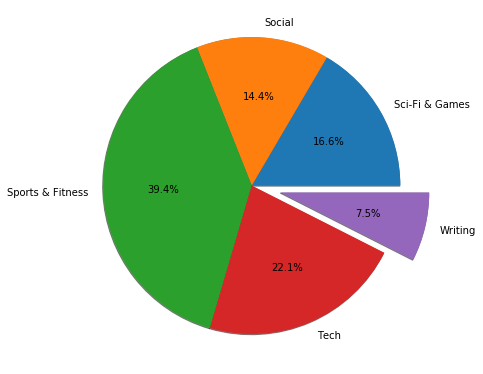

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((0,0,.5,1))
plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',radius =5,shadow=True)
plt.axis('equal')
plt.show()

## Scatter plots

The data is usually displayed as a collection of points, and is often used to plot various kinds of correlations. 

In [9]:
import seaborn as sns

# Transpose dataframe
students = pd.read_csv("Data/ucdavis.csv")
students.head()

,gender,tv,computer,sleep,height,momheight,dadheight,exercise,gpa
0,Female,13.0,10.0,3.5,66.0,66.0,71.0,10.0,4.00
1,Male,20.0,7.0,9.0,72.0,64.0,65.0,2.0,2.30
2,Male,15.0,15.0,6.0,68.0,62.0,74.0,3.0,2.60
3,Male,8.0,20.0,6.0,68.0,59.0,70.0,6.0,2.80
4,Female,2.5,10.0,5.0,64.0,65.0,70.0,6.5,2.62


In [10]:
students.gender.value_counts()

Female    81
Male      67
Name: gender, dtype: int64

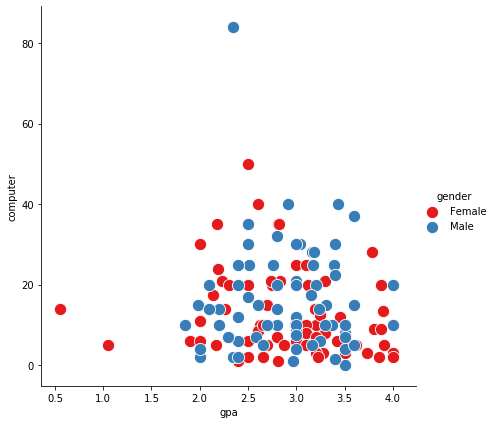

In [14]:
# set categories using hue
g = sns.FacetGrid(students, hue="gender", palette="Set1", size=6)

g.map(plt.scatter, "gpa", "computer",linewidth=0.85,s = 150,
  edgecolor="white")

g.add_legend()

## KDE plots

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function and its average across the observed data points to create a smooth approximation. 

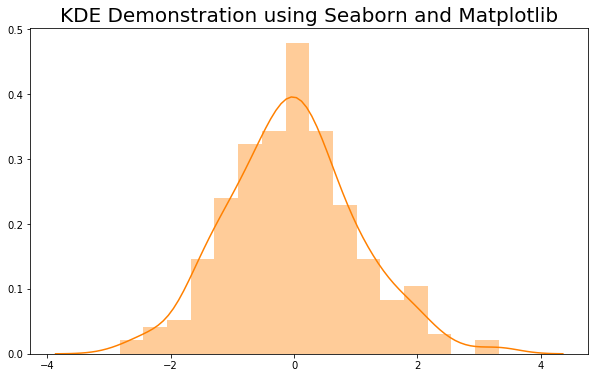

In [12]:
from numpy.random import randn
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("hls")
mpl.rc("figure", figsize=(10,6))
data = randn(250)
plt.title("KDE Demonstration using Seaborn and Matplotlib", fontsize=20)
sns.distplot(data, color='#ff8000')

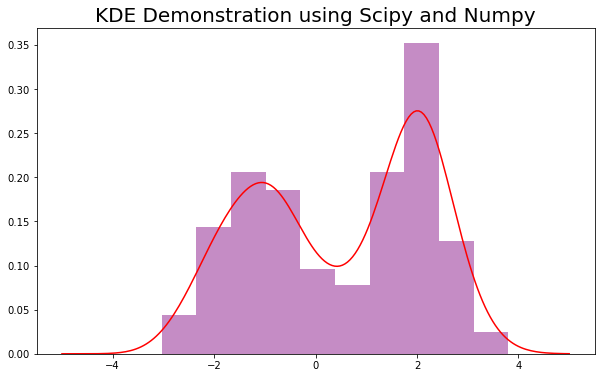

In [13]:
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from numpy import linspace, hstack
from pylab import plot, show, hist

sample1 = norm.rvs(loc=-1.0, scale=1, size=320)
sample2 = norm.rvs(loc=2.0, scale=0.6, size=320)
sample = hstack([sample1, sample2])
probDensityFun = gaussian_kde(sample)
plt.title("KDE Demonstration using Scipy and Numpy", fontsize=20)
x = linspace(-5,5,200)
plot(x, probDensityFun(x), 'r')
hist(sample, density=1, alpha=0.45, color='purple')
show()